In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [122]:
# load data
data = pd.read_csv("/Users/korzeniewski/Desktop/tensor-course/insurance.csv")
data

# make encoding
data["sex"].replace(["female", "male"], [0,1], inplace = True)
data["smoker"].replace(["no", "yes"], [0,1], inplace = True)
data.info()
data.nunique()
data = pd.get_dummies(data)
data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [123]:
# normalization and standardization
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Column transformer - normalization 0-1
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), #normalization value in this columns
    #(OneHotEncoder(handle_unknown="ignore"), ['sex', 'smoker', 'region']) zrobi enkodowanie
    remainder='passthrough'
)

# transforming data convert pandas to numpy so transform
# will be done after spliting data


In [124]:
# create X & Y sets
X = data.drop("charges", axis = 1)
y = data["charges"]

In [106]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,0,0,0,1
1,18,1,33.770,1,0,0,0,1,0
2,28,1,33.000,3,0,0,0,1,0
3,33,1,22.705,0,0,0,1,0,0
4,32,1,28.880,0,0,0,1,0,0


In [107]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [130]:
# creating train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
len(X), len(X_train), len(y_train)
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [131]:
X_train[0]

array([0.93478261, 0.40893193, 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        ])

In [132]:
tf.random.set_seed(42)

# 1. Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, name = "input"),
    tf.keras.layers.Dense(1, name = "output")
])

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.SGD(),
            metrics = ["mae"])

# 3. Train model
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [133]:
# check the results
model.evaluate(X_test, y_test)
pred = model.predict(X_test)
pred = np.reshape(pred,(len(pred),))

13/13 [==============================] - 0s 2ms/step - loss: 3239.0845 - mae: 3239.0845


Text(0, 0.5, 'Charges')

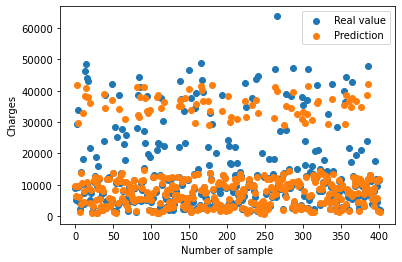

In [134]:
plt.scatter(range(len(y_test)), y_test)
plt.scatter(range(len(y_test)), pred)
plt.legend(['Real value', 'Prediction'])
plt.xlabel('Number of sample')
plt.ylabel('Charges')

In [137]:
# improve model - adding next layer and change Optimizer
tf.random.set_seed(42)

# 1. Create model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model2.compile(loss=tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["mae"])

# 3. Train model
model2.fit(X_train, y_train, epochs = 100, verbose=0)

In [138]:
# check the results
model2.evaluate(X_test, y_test)
pred = model2.predict(X_test)
pred = np.reshape(pred,(len(pred),))

13/13 [==============================] - 0s 4ms/step - loss: 5938.6499 - mae: 5938.6499


In [153]:
# improve model - more epchos
tf.random.set_seed(42)

# 1. Create model
model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile model
model3.compile(loss=tf.keras.losses.mae,
            optimizer = tf.keras.optimizers.Adam(),
            metrics = ["mae"])

# 3. Train model
history = model3.fit(X_train, y_train, epochs = 200, verbose=0)

In [154]:
# check the results
model3.evaluate(X_test, y_test)
pred = model3.predict(X_test)
pred = np.reshape(pred,(len(pred),))

13/13 [==============================] - 0s 3ms/step - loss: 3361.4309 - mae: 3361.4309


Text(0.5, 0, 'epchos')

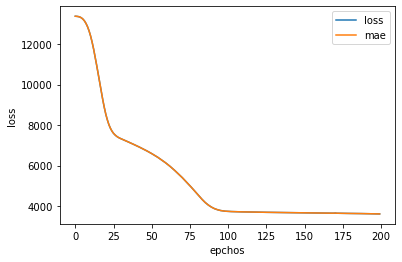

In [155]:
# Plot training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epchos")